# Project 01 - Color Compression

## Thông tin sinh viên

- Họ và tên: Lê Thị Hồng Hạnh
- MSSV: 22127103
- Lớp: 22CLC07

## Import các thư viện liên quan

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

## Helper functions

In [10]:
def read_img(img_path):
    '''
    Read image from img_path

    Parameters
    ----------
    img_path : str
        Path of image

    Returns
    -------
        Image (2D)
    '''

    # YOUR CODE HERE
    img_2d = Image.open(img_path)
    if img_2d.mode != 'RGB':
        img_2d = img_2d.convert('RGB')
    img_2d = np.array(img_2d)
    return img_2d


def show_img(img_2d):
    '''
    Show image

    Parameters
    ----------
    img_2d : <your type>
        Image (2D)
    '''

    # YOUR CODE HERE
    plt.imshow(img_2d)


def save_img(img_2d, img_path):
    '''
    Save image to img_path

    Parameters
    ----------
    img_2d : <your type>
        Image (2D)
    img_path : str
        Path of image
    '''

    # YOUR CODE HERE
    try:
      img = Image.fromarray(np.uint8(img_2d))
      dot_index = img_path.rfind('.')
      img.save(img_path, img_path[dot_index+1:])
    except KeyError:
      print('Can not save compressed image. The extension is invalid')
    except IOError:
      print('Can not save compressed image. The path is invalid')


def convert_img_to_1d(img_2d):
    '''
    Convert 2D image to 1D image

    Parameters
    ----------
    img_2d : <your type>
        Image (2D)

    Returns
    -------
        Image (1D)
    '''

    # YOUR CODE HERE
    img_1d = img_2d.reshape(img_2d.shape[0] * img_2d.shape[1], img_2d.shape[2])
    #convert from uint8 to int64 in order to calculate distance correctly
    img_1d = img_1d.astype(float)
    return img_1d


def kmeans(img_1d, k_clusters, max_iter=100, init_centroids='random'):
    '''
    K-Means algorithm

    Parameters
    ----------
    img_1d : np.ndarray with shape=(height * width, num_channels)
        Original (1D) image
    k_clusters : int
        Number of clusters
    max_iter : int
        Max iterator
    init_centroids : str, default='random'
        The method used to initialize the centroids for K-means clustering
        'random' --> Centroids are initialized with random values between 0 and 255 for each channel
        'in_pixels' --> A random pixel from the original image is selected as a centroid for each cluster

    Returns
    -------
    centroids : np.ndarray with shape=(k_clusters, num_channels)
        Stores the color centroids for each cluster
    labels : np.ndarray with shape=(height * width, )
        Stores the cluster label for each pixel in the image
    '''

    # YOUR CODE HERE
    centroids = initialize_centroids(img_1d, k_clusters, init_centroids).astype(float)
    for i in range (max_iter):
        #calculate distance between all pixels and centroids
        difference = img_1d - centroids[:, np.newaxis, :]
        distance = np.linalg.norm(difference, axis=2)
        #find the smallest distance from each pixels to all centroids and assign the index of centroids to labels
        labels = np.argmin(distance, axis=0)
        #update centroids
        new_centroids = np.copy(centroids)
        for j in range (k_clusters):
            cluster_j = img_1d[labels == j, :]
            if len(cluster_j) == 0:
                continue
            new_centroids[j] = np.average(cluster_j, axis=0)
        if np.allclose(new_centroids, centroids, atol=1):
            break
        max_iter-=1
        centroids = new_centroids
    return centroids, labels



def generate_2d_img(img_2d_shape, centroids, labels):
    '''
    Generate a 2D image based on K-means cluster centroids

    Parameters
    ----------
    img_2d_shape : tuple (height, width, 3)
        Shape of image
    centroids : np.ndarray with shape=(k_clusters, num_channels)
        Store color centroids
    labels : np.ndarray with shape=(height * width, )
        Store label for pixels (cluster's index on which the pixel belongs)

    Returns
    -------
        New image (2D)
    '''

    # YOUR CODE HERE
    new_img_2d = [centroids[i] for i in labels]
    new_img_2d = np.array(new_img_2d)
    new_img_2d = new_img_2d.reshape(img_2d_shape)
    new_img_2d = new_img_2d.astype(np.uint8)
    return new_img_2d



# Your additional functions here
def initialize_centroids(img_1d, k_clusters, init_centroids):
    centroids = None
    if init_centroids == 'random':
        centroids = np.random.choice(256, size=(k_clusters, img_1d.shape[1]), replace=False)
    elif init_centroids == 'in_pixels':
        unique_rows = np.unique(img_1d, axis=0)
        centroids = unique_rows[np.random.choice(unique_rows.shape[0], size=k_clusters, replace=False)]
    else:
        raise ValueError("Invalid initialization method. The method used to initialize the centroids must be 'random' or 'in_pixels")
    return centroids

def create_new_img_path(old_img_path, extension):
    dot_index = old_img_path.rfind('.')
    new_img_path = old_img_path[:dot_index] + '_compressed' + extension
    return new_img_path


## Your tests

In [ ]:
# YOUR CODE HERE
# img_path = '/content/dog.jpeg'
# k = int(input('Enter k:'))
# img_2d = read_img(img_path)
# img_1d = convert_img_to_1d(img_2d)
# centroids, labels = kmeans(img_1d, k)
# new_img_2d = generate_2d_img(img_2d.shape, centroids, labels)
# show_img(new_img_2d)
# ans = input('Do you want to save picture(y/n):')
# if ans == 'yes' or ans == 'y':
#     extension = input('Enter the extension of file (.jpeg, .png, .pdf,...):')
#     new_img_path = create_new_img_path(img_path, extension)
#     save_img(new_img_2d, new_img_path)

## Main FUNCTION

In [19]:
# YOUR CODE HERE
def main():
    img_path = input('Enter img_path:')
    k = int(input('Enter k:'))
    #read image
    img_2d = read_img(img_path)
    #convert img_2d to img_1d
    img_1d = convert_img_to_1d(img_2d)
    #apply kmeans clustering
    centroids, labels = kmeans(img_1d, k)
    #generate new image
    new_img_2d = generate_2d_img(img_2d.shape, centroids, labels)
    ans = input('Do you want to save picture(y/n):')
    if ans == 'yes' or ans == 'y':
        extension = input('Enter the extension of file (.jpeg, .png, .pdf,...):')
        #create new image path and save image
        new_img_path = create_new_img_path(img_path, extension)
        save_img(new_img_2d, new_img_path)
    #show compressed image
    print('Compressed image:')
    show_img(new_img_2d)

Enter img_path:/content/dog.jpeg
Enter k:10
Do you want to save picture(y/n):y
Enter the extension of file (.jpeg, .png, .pdf,...):.pdf
Compressed image:


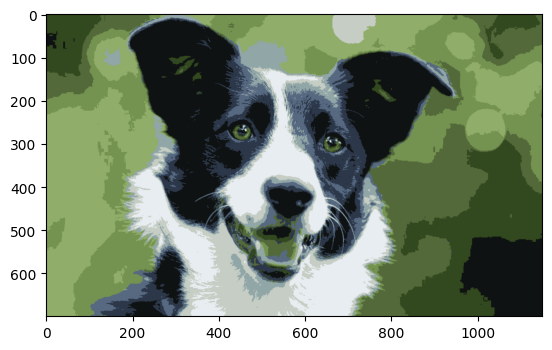

In [24]:
# Call main function
main()